# Simple Autoencoder for MNIST

https://blog.keras.io/building-autoencoders-in-keras.html

Using Theano backend.


<IPython.core.display.Javascript object>

autoscrolling long output is disabled


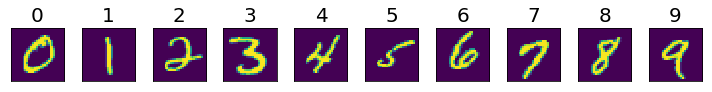

In [1]:
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.callbacks import History 
import utils;reload(utils)
utils.disable_scrolling()

data = utils.MNIST()
(X,Y) = data.get_ordered_sample()
utils.plot_array(X, titles=Y, cmap=None, limit=10)

batches = []
batches = data.get_autoencode_training_batches(batch_size=100)
val_batches = data.get_autoencode_test_batches(batch_size=100)

In [2]:
# Build the model
from keras.layers import Input, Dense, Dropout, Flatten, Reshape
from keras.models import Model, Sequential
from keras import regularizers
import numpy as np

# 32 dimensions encoded
encoding_dim = 32
input_shape = (784,)
input_vector = Input(shape=input_shape)
encoded_vector = Input(shape=(encoding_dim,))

model_encoder = Sequential(name='encoder')
model_encoder.add(Dense(encoding_dim, 
                        input_shape=input_shape,
                        W_regularizer=regularizers.l1(10e-5),
                        activation='relu'))
model_encoder.add(Dropout(0.1))
model_encoder.summary()

encoder_output_shape = model_encoder.output_shape[1:]
print("Encoded Shape %s, Size: %s" % (encoder_output_shape, np.prod(encoder_output_shape)))

model_decoder = Sequential(name='decoder')
model_decoder.add(Dense(784, input_shape=encoder_output_shape, activation='sigmoid'))
model_decoder.summary()

model = Sequential(name='autoencoder')
model.add(model_encoder)
model.add(model_decoder)
model.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 32)            25120       dense_input_1[0][0]              
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32)            0           dense_1[0][0]                    
Total params: 25120
____________________________________________________________________________________________________
Encoded Shape (32,), Size: 32
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 784)           25872       dense_input_2[0][0]              
Total params: 25872
_____________________

Training Set Size 120000
Mean Encoded: 0.21736258


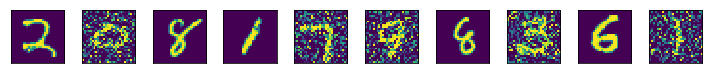

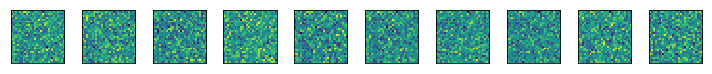

Epoch 1/20, Loss: 0.32582 Acc: 0.78529 Val Loss: 0.24335 Val Acc: 0.80241
Mean Encoded: 2.00498033


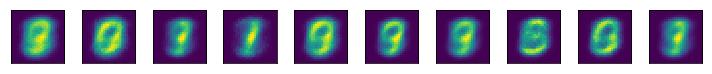

Epoch 3/20, Loss: 0.23473 Acc: 0.79867 Val Loss: 0.20647 Val Acc: 0.79131
Mean Encoded: 1.75829554


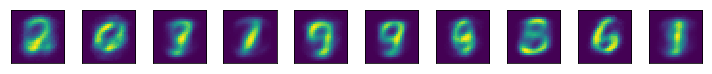

Epoch 5/20, Loss: 0.21673 Acc: 0.80122 Val Loss: 0.18374 Val Acc: 0.81286
Mean Encoded: 1.59957659


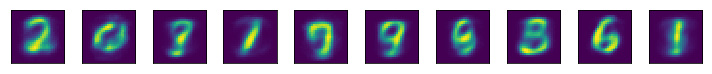

Epoch 7/20, Loss: 0.20624 Acc: 0.80318 Val Loss: 0.17290 Val Acc: 0.80517
Mean Encoded: 1.51499331


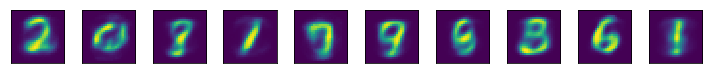

Epoch 9/20, Loss: 0.19933 Acc: 0.80437 Val Loss: 0.16483 Val Acc: 0.80385
Mean Encoded: 1.44665241


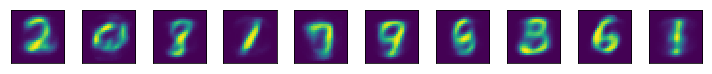

Epoch 11/20, Loss: 0.19495 Acc: 0.80505 Val Loss: 0.16627 Val Acc: 0.79704
Mean Encoded: 1.38439727


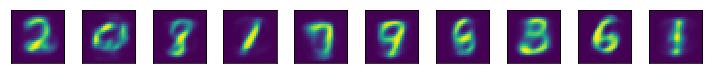

Epoch 13/20, Loss: 0.19181 Acc: 0.80539 Val Loss: 0.16153 Val Acc: 0.79990
Mean Encoded: 1.33097386


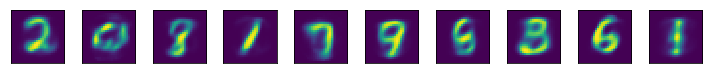

Epoch 15/20, Loss: 0.18944 Acc: 0.80562 Val Loss: 0.16948 Val Acc: 0.79846
Mean Encoded: 1.28775120


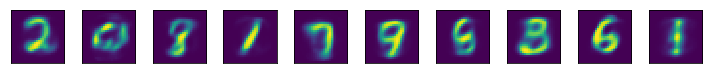

Epoch 17/20, Loss: 0.18752 Acc: 0.80582 Val Loss: 0.14982 Val Acc: 0.81226
Mean Encoded: 1.24818802


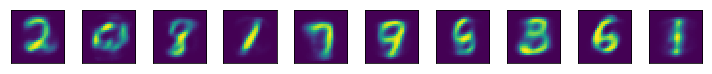

Epoch 19/20, Loss: 0.18607 Acc: 0.80586 Val Loss: 0.15554 Val Acc: 0.80705
Mean Encoded: 1.21648359


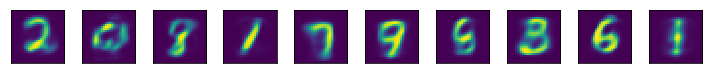

Epoch 20/20, Loss: 0.18549 Acc: 0.80590 Val Loss: 0.14959 Val Acc: 0.81411
Mean Encoded: 1.19637847


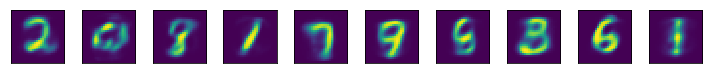

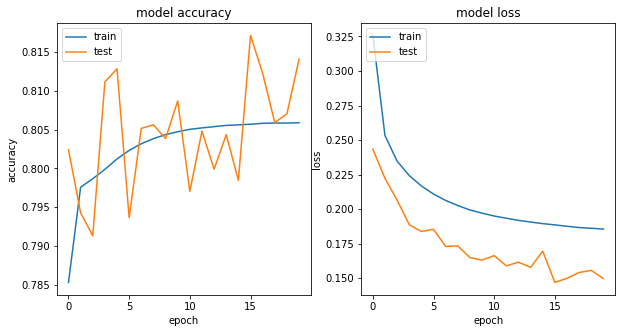

In [3]:
# Fit data with regular training, as well as noisy training sets
reload(utils)       
N = batches.N
#N = 100
epochs = 20
history = History()
callback = utils.VisualCallback(model_encoder, model_decoder, history, val_batches, 100)
model.fit_generator(batches, N, epochs, verbose=0, callbacks=[history, callback]);

In [9]:
reload(utils)
utils.save_model(model, "models/simple_autoencoder.autoencoder")
utils.save_model(model_encoder, "models/simple_autoencoder.encoder")
utils.save_model(model_decoder, "models/simple_autoencoder.decoder")

Model saved: models/simple_autoencoder.autoencoder.model.json
Weights saved: models/simple_autoencoder.autoencoder.weights.h5
Model saved: models/simple_autoencoder.encoder.model.json
Weights saved: models/simple_autoencoder.encoder.weights.h5
Model saved: models/simple_autoencoder.decoder.model.json
Weights saved: models/simple_autoencoder.decoder.weights.h5
